# importing data 

In [1]:
data_directory ='cifar-10-batches-py/'

### the data is "pickled"
### so we have to unpickle them
the flolowing scrept can be found at https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [3]:
import os
os.chdir(data_directory)
all_data=os.listdir()
os.chdir('..')

In [4]:
all_data

['batches.meta',
 'data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'test_batch']

In [5]:
batches=[]
for data_batch in all_data:
    batches.append(unpickle(data_directory+data_batch))
    


In [6]:
#which will out put a list of dictionaries

# experimting and understanding CIFAR 10 data set

#### under standing images 


In [7]:
batches[0]

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [8]:
batches[1].keys()

dict_keys([b'data', b'labels', b'filenames', b'batch_label'])

In [9]:
batches[6][ b'data'].shape

(10000, 3072)

In [10]:
batches[1][b'batch_label']


b'training batch 1 of 5'

Loaded in this way, each of the batch files contains a dictionary with the following elements:
* data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
* labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:

* label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

In [11]:
batches[0][b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [12]:
batches[1][ b'data'][0].shape

(3072,)

In [13]:
import numpy as np
red=np.reshape(batches[1][ b'data'][0][0:1024],[32,32])
green=np.reshape(batches[1][ b'data'][0][1024:(1024+1024)],[32,32])
blue=np.reshape(batches[1][ b'data'][0][(1024+1024):(1024+1024+1024)],[32,32])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

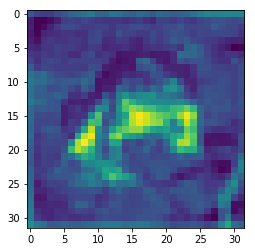

In [15]:
plt.imshow(blue)

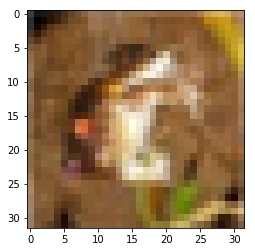

In [16]:
plt.imshow((np.transpose(np.array((red,green,blue)))))

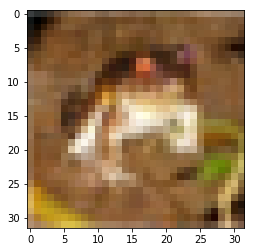

In [17]:
plt.imshow((np.transpose(np.array((red,green,blue)))).transpose(1,0,2))
#transpose  takes the new axis index

In [18]:
batch1_images=batches[1][ b'data']
batch1_images = batch1_images.reshape(10000, 3, 32, 32).transpose(0,2,3,1)
batch1_images.shape

(10000, 32, 32, 3)

(32, 32, 3)

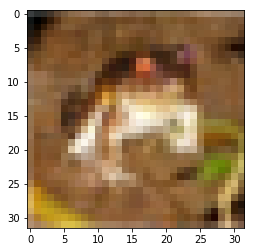

In [19]:
plt.imshow(batch1_images[0])
batch1_images[0].shape

# showing random  images

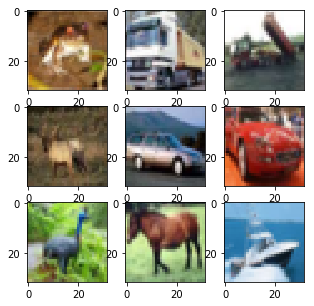

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(5,5))
i=0
for r in range(3):
    for c in range(3):
        axs[r,c].imshow(batch1_images[i])
        i+=1


#### under standing labels
labels gives a number between 0 and 10  to refer to one of the difrent 10 classes

In [21]:
#sample of the labels
batches[1][b'labels'][0:10]


[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]

#####  creating a function to on ehot encode the labels

In [22]:
def one_hot(nums):
    n=len(nums)
    out=np.zeros([n,10])
    out[range(n),nums]=1
    return out
    

In [23]:
x=batches[1][b'labels'][0:10]

In [24]:
print(one_hot(x))

[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


### correlate between labels and their meanins

In [25]:
correlation={}
for n,name in enumerate(batches[0][b'label_names']):
    correlation[n]=name
correlation

{0: b'airplane',
 1: b'automobile',
 2: b'bird',
 3: b'cat',
 4: b'deer',
 5: b'dog',
 6: b'frog',
 7: b'horse',
 8: b'ship',
 9: b'truck'}

In [26]:
for i in batches[1][b'labels'][0:9] :
    print(correlation[i])

b'frog'
b'truck'
b'truck'
b'deer'
b'automobile'
b'automobile'
b'bird'
b'horse'
b'ship'


# ctreating class to handel data , labels and next function method

In [27]:
#Clarification of loading and np v stacking
s=[d[b'data'] for d in batches[1:6]]
np.vstack(s).shape

(50000, 3072)

In [28]:
class cifar_loader(object):
    def __init__(self,Data_path):
        self.PATH=Data_path
        self._i=0
        self.images=None
        self.labels=None
        self.test_images=None
        self.test_labels=None

        
    def load(self):# used to load the data after definig the object
        os.chdir(self.PATH)
        all_data=os.listdir()
        os.chdir('..')
        data=[unpickle(self.PATH+f) for f in all_data ]
        img=np.vstack([d[b'data']for d in data[1:6]]) #specifing 1 : 6  to avoid searching b"data" in the firs dictionary which dosent have this key
        n=len(img)
        self.images=img.reshape(n,3,32,32).transpose(0,2,3,1)/255
        self.labels=one_hot(np.hstack([d[b'labels'] for d in data[1:6]]))
        
        
        img=np.vstack([data[6][b'data']]) #specifing 1 : 6  to avoid searching b"data" in the firs dictionary which dosent have this key
        n=len(img)
        self.test_images=img.reshape(n,3,32,32).transpose(0,2,3,1)/255
        self.test_labels=one_hot(np.hstack([data[6][b'labels']]))

    def next_batch(self,batch_size):#used by the object in the training sessions
        x,y=self.images[self._i:self._i+batch_size].reshape(batch_size,32,32,3),self.labels[self._i:self._i+batch_size]
        self._i= (self._i+batch_size)%len(self.images)
        return x,y
    
    def unpickle(file):
        import pickle
        with open(file, 'rb') as fo:
            cifar_dict = pickle.load(fo, encoding='bytes')
        return cifar_dict
    
    def one_hot(nums,vals=10):
        n=len(nums)
        out=np.zeros([n,vals])
        out[range(n),nums]=1
        return out
    

In [29]:
cifar10=cifar_loader(data_directory)
cifar10.load()

In [30]:
training_images=cifar10.images
training_labels=cifar10.labels
testing_images=cifar10.test_images
testing_labels=cifar10.test_labels

In [31]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [32]:
evlauation_images=cifar10.test_images[5000:10000]
evaluation_labels=cifar10.test_labels[5000:10000]
testing_images=cifar10.test_images[0:5000]
testing_labels=cifar10.test_labels[0:5000]
print(evlauation_images.shape)
print(evaluation_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(5000, 32, 32, 3)
(5000, 10)
(5000, 32, 32, 3)
(5000, 10)


# CREATING THE MODEL

In [33]:

import tensorflow as tf

In [35]:

                                                     # helper functions

# weights
def init_weights(shape,stddev=0.1):
    weights=tf.truncated_normal(shape=shape,stddev=stddev)
    return tf.Variable(weights)
    
# biases
def init_bias(shape,stddev=0.1):
    init_bias_vals=tf.constant(value=0.1,shape=shape)
    return tf.Variable(init_bias_vals)
    
# conv
def conv2d(input_tensor,kernal_weights,strides=[1,1,1,1]):
    #input_tensor is the image or a convoulution of image , it takes[batch_size,Heigh,Width,Color_Channels]
    
    #Kernal it is the filter representing the convolution layer , it takes [filter H ,filter W,Channels IN,CHANNELS OUT]
    
    #Channels IN : when dealling with input from image it's channels will be 3  which are the colors, but when dealing with 
    #input from convolution the channels will be layers of abstracted featers filtered by the previously constracted convolution
    
    #Channel OUT is the number of filters where :(every filter will output or recogize single feature )
    #strides shifting the cernal by stride number of pixels
    return tf.nn.conv2d(input=input_tensor,filter=kernal_weights,strides=strides,padding="SAME")
# conv layer
def convolution_layer(input_tensor,kernal):
    w=init_weights(kernal)
    b=init_bias([kernal[3]])#same size as the output channels
    return tf.nn.relu(conv2d(input_tensor,w)+b)
# pooling
def max_pool_2x2(input_tensor):
    #input_tensor is the image or a convoulution of image , it takes[batch_size,Heigh,Width,Color_Channels]
    return tf.nn.max_pool(value=input_tensor,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    #[1,2,2,1] to max pool by value of 2x2 pixels but not pooling from 2 ifferey batches or channels

# fully connected layer

#this layers takes the featerures abstracted by the convoulution layer and make the ordinary classification on it 
def fully_connected_layer(input_tensor,size):
    """
    #Kernal it is the filter representing the convolution layer , it takes [filter H ,filter W,Channels IN,CHANNELS OUT]
    
    #Channels IN : when dealling with input from image it's channels will be 3  which are the colors, but when dealing with 
    #input from convolution the channels will be layers of abstracted featers filtered by the previously constracted convolution
    
    #Channel OUT is the number of filters where :(every filter will output or recogize single feature )
    """
    input_shape=int(input_tensor.get_shape()[1])
    
    w=init_weights([input_shape,size])
    b=init_bias(shape=[size])
    return tf.add(tf.matmul(input_tensor,w),b)

In [39]:
                                                       # model 
#placeholders
images_ph=tf.placeholder(tf.float32,shape=[None,32,32,3])
labels_ph=tf.placeholder(tf.float32,shape=[None,10])
drop_out_ph=tf.placeholder(tf.float32)



CNL_1=convolution_layer(images_ph,[4,4,3,32])

pool_layer_1=max_pool_2x2(CNL_1)

CNL_2=convolution_layer(pool_layer_1,[4,4,32,64])

pool_layer_2=max_pool_2x2(CNL_2)

flat_layer=tf.reshape(pool_layer_2,shape=[-1,8*8*64])

DNL_1=tf.nn.relu(fully_connected_layer(flat_layer,size=1024))

drop_out_layer=tf.nn.dropout(DNL_1,keep_prob=drop_out_ph)

DNL_learned=fully_connected_layer(drop_out_layer,size=10)


In [40]:
                                                    #tuning method
#loss function
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels_ph,logits=DNL_learned))
#optimizer
optimizer=tf.train.AdamOptimizer()
train=optimizer.minimize(cross_entropy)
#initiate vrables
init=tf.global_variables_initializer()


In [41]:

saver = tf.train.Saver()
batch_size=50
training_steps=5000 # it will see all the data twice
with tf.Session() as sess :
    sess.run(init)
    for i in range(training_steps):
        
        d,l=cifar10.next_batch(batch_size)
        
        sess.run(train,feed_dict={images_ph:d,labels_ph:l,drop_out_ph:0.5})
        
        
        if i % 1000 == 0:
            matches =tf.equal(tf.argmax(DNL_learned,1),tf.arg_max(labels_ph,1))
            accuracy=tf.reduce_mean(tf.cast(matches,tf.float32))
            print("step:",i)
            print("model accuracy : ",sess.run(accuracy,feed_dict={labels_ph:testing_labels,images_ph:testing_images,drop_out_ph:1.0}))
        
    saver.save(sess,"cifar10_cnn/cnn_cifar10.ckpt")


Instructions for updating:
Use `argmax` instead
step: 0
model accuracy :  0.0754
step: 1000
model accuracy :  0.5804
step: 2000
model accuracy :  0.6442
step: 3000
model accuracy :  0.671
step: 4000
model accuracy :  0.6754


#### this model won't show much emprovement over time 

#### model 2 i will increase the fully connected layer size to 2048 

In [56]:
                                                       # model 2
#placeholders
images_ph=tf.placeholder(tf.float32,shape=[None,32,32,3])
labels_ph=tf.placeholder(tf.float32,shape=[None,10])
drop_out_ph=tf.placeholder(tf.float32)


CNL_1=convolution_layer(images_ph,[4,4,3,32])

pool_layer_1=max_pool_2x2(CNL_1)

CNL_2=convolution_layer(pool_layer_1,[4,4,32,64])

pool_layer_2=max_pool_2x2(CNL_2)

flat_layer=tf.reshape(pool_layer_2,shape=[-1,8*8*64])

DNL_1=tf.nn.relu(fully_connected_layer(flat_layer,size=2048))

drop_out_layer=tf.nn.dropout(DNL_1,keep_prob=drop_out_ph)

DNL_learned=fully_connected_layer(drop_out_layer,size=10)


In [57]:
                                                    #tuning method
#loss function
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels_ph,logits=DNL_learned))
#optimizer
optimizer=tf.train.AdamOptimizer()
train=optimizer.minimize(cross_entropy)
#initiate vrables
init=tf.global_variables_initializer()

In [59]:
saver = tf.train.Saver()
batch_size=50
training_steps=10000 # it will see all the data twice
with tf.Session() as sess :
    sess.run(init)
    for i in range(training_steps):
        
        d,l=cifar10.next_batch(batch_size)
        
        sess.run(train,feed_dict={images_ph:d,labels_ph:l,drop_out_ph:0.5})
        
        
        if i % 1000 == 0:
            matches =tf.equal(tf.argmax(DNL_learned,1),tf.arg_max(labels_ph,1))
            accuracy=tf.reduce_mean(tf.cast(matches,tf.float32))
            print("step:",i)
            print("model accuracy : ",sess.run(accuracy,feed_dict={labels_ph:testing_labels,images_ph:testing_images,drop_out_ph:1.0}))
        
    saver.save(sess,"cifar10_cnn/cnn_cifar10.ckpt")

step: 0
model accuracy :  0.103
step: 1000
model accuracy :  0.5528
step: 2000
model accuracy :  0.6172
step: 3000
model accuracy :  0.6514
step: 4000
model accuracy :  0.6646
step: 5000
model accuracy :  0.6594
step: 6000
model accuracy :  0.66
step: 7000
model accuracy :  0.6652
step: 8000
model accuracy :  0.667
step: 9000
model accuracy :  0.6698


#### this model did worse than before 

#### model three with more consecutive convolution layers 

In [35]:
                                                       # model 3
#placeholders
images_ph=tf.placeholder(tf.float32,shape=[None,32,32,3])
labels_ph=tf.placeholder(tf.float32,shape=[None,10])
drop_out_ph=tf.placeholder(tf.float32)


CNL_1=convolution_layer(images_ph,[4,4,3,32])
CNL_2=convolution_layer(CNL_1,[4,4,32,32])
CNL_3=convolution_layer(CNL_2,[4,4,32,32])

pool_layer_1=max_pool_2x2(CNL_3)

CNL_4=convolution_layer(pool_layer_1,[4,4,32,64])
CNL_5=convolution_layer(CNL_4,[4,4,64,64])
CNL_6=convolution_layer(CNL_5,[4,4,64,64])

pool_layer_2=max_pool_2x2(CNL_6)

flat_layer=tf.reshape(pool_layer_2,shape=[-1,8*8*64])

DNL_1=tf.nn.relu(fully_connected_layer(flat_layer,size=2048))

drop_out_layer=tf.nn.dropout(DNL_1,keep_prob=drop_out_ph)

DNL_learned=fully_connected_layer(drop_out_layer,size=10)


In [36]:
                                                    #tuning method
#loss function
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels_ph,logits=DNL_learned))
#optimizer
optimizer=tf.train.AdamOptimizer()
train=optimizer.minimize(cross_entropy)
#initiate vrables
init=tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [41]:
                                                       # model 4
#placeholders
images_ph=tf.placeholder(tf.float32,shape=[None,32,32,3],name="images_ph")
labels_ph=tf.placeholder(tf.float32,shape=[None,10],name="labels_ph")
drop_out_ph=tf.placeholder(tf.float32,name="drop_out_ph")


CNL_1=convolution_layer(images_ph,[4,4,3,32])
CNL_2=convolution_layer(CNL_1,[4,4,32,32])
CNL_3=convolution_layer(CNL_2,[4,4,32,32])

pool_layer_1=max_pool_2x2(CNL_3)

CNL_4=convolution_layer(pool_layer_1,[4,4,32,64])
CNL_5=convolution_layer(CNL_4,[4,4,64,64])
CNL_6=convolution_layer(CNL_5,[4,4,64,64])

pool_layer_2=max_pool_2x2(CNL_6)

flat_layer=tf.reshape(pool_layer_2,shape=[-1,8*8*64])

DNL_1=tf.nn.relu(fully_connected_layer(flat_layer,size=1024))

drop_out_layer=tf.nn.dropout(DNL_1,keep_prob=drop_out_ph)

DNL_learned=fully_connected_layer(drop_out_layer,size=10)

In [42]:
                                                    #tuning method
#loss function
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels_ph,logits=DNL_learned))
#optimizer
optimizer=tf.train.AdamOptimizer()
train=optimizer.minimize(cross_entropy)
#initiate vrables
init=tf.global_variables_initializer()

In [44]:
saver = tf.train.Saver()
batch_size=50
training_steps=20000 # it will see all the data twice
with tf.Session() as sess :
    sess.run(init)
    for i in range(training_steps):
        
        d,l=cifar10.next_batch(batch_size)
        
        sess.run(train,feed_dict={images_ph:d,labels_ph:l,drop_out_ph:0.5})
        
        
        if i % 1000 == 0:
            matches =tf.equal(tf.argmax(DNL_learned,1),tf.arg_max(labels_ph,1))
            accuracy=tf.reduce_mean(tf.cast(matches,tf.float32))
            print("step:",i)
            print("model accuracy : ",sess.run(accuracy,feed_dict={labels_ph:testing_labels,images_ph:testing_images,drop_out_ph:1.0}))
        
    saver.save(sess,"cifar10_cnn/cnn_cifar10.ckpt")

step: 0
model accuracy :  0.1022
step: 1000
model accuracy :  0.4984
step: 2000
model accuracy :  0.568
step: 3000
model accuracy :  0.62
step: 4000
model accuracy :  0.6482
step: 5000
model accuracy :  0.6716
step: 6000
model accuracy :  0.683
step: 7000
model accuracy :  0.657
step: 8000
model accuracy :  0.6846
step: 9000
model accuracy :  0.6894
step: 10000
model accuracy :  0.699
step: 11000
model accuracy :  0.7016
step: 12000
model accuracy :  0.6966
step: 13000
model accuracy :  0.6922
step: 14000
model accuracy :  0.6972
step: 15000
model accuracy :  0.7046
step: 16000
model accuracy :  0.7032
step: 17000
model accuracy :  0.693
step: 18000
model accuracy :  0.7108
step: 19000
model accuracy :  0.703
step: 20000
model accuracy :  0.712
step: 21000
model accuracy :  0.7104


KeyboardInterrupt: 

In [38]:
                                                       # model 5
#placeholders
images_ph=tf.placeholder(tf.float32,shape=[None,32,32,3],name="images_ph")
labels_ph=tf.placeholder(tf.float32,shape=[None,10],name="labels_ph")
drop_out_ph=tf.placeholder(tf.float32,name="drop_out_ph")
c1,c2,c3=30,50,80
F1=500

CNL_1=convolution_layer(images_ph,[3,3,3,c1])
CNL_2=convolution_layer(CNL_1,[3,3,c1,c1])
CNL_3=convolution_layer(CNL_2,[3,3,c1,c1])

pool_layer_1=max_pool_2x2(CNL_3)

CNL_4=convolution_layer(pool_layer_1,[3,3,c1,c2])
CNL_5=convolution_layer(CNL_4,[3,3,c2,c2])
CNL_6=convolution_layer(CNL_5,[3,3,c2,c2])

pool_layer_2=max_pool_2x2(CNL_6)


CNL_7=convolution_layer(pool_layer_2,[3,3,c2,c3])
CNL_8=convolution_layer(CNL_7,[3,3,c3,c3])
CNL_9=convolution_layer(CNL_8,[3,3,c3,c3])

pool_layer_3=max_pool_2x2(CNL_9)





flat_layer=tf.reshape(pool_layer_3,shape=[-1,4*4*c3])

DNL_1=tf.nn.relu(fully_connected_layer(flat_layer,size=500))

drop_out_layer=tf.nn.dropout(DNL_1,keep_prob=drop_out_ph)

DNL_learned=fully_connected_layer(drop_out_layer,size=10)

In [39]:
                                                    #tuning method
#loss function
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels_ph,logits=DNL_learned))
#optimizer
optimizer=tf.train.AdamOptimizer()
train=optimizer.minimize(cross_entropy)
#initiate vrables
init=tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [41]:
saver = tf.train.Saver()
batch_size=50
training_steps=20000 # it will see all the data twice
with tf.Session() as sess :
    sess.run(init)
    for i in range(training_steps):
        
        d,l=cifar10.next_batch(batch_size)
        
        sess.run(train,feed_dict={images_ph:d,labels_ph:l,drop_out_ph:0.5})
        
        
        if i % 1000 == 0:
            matches =tf.equal(tf.argmax(DNL_learned,1),tf.arg_max(labels_ph,1))
            accuracy=tf.reduce_mean(tf.cast(matches,tf.float32))
            print("step:",i)
            print("model accuracy : ",sess.run(accuracy,feed_dict={labels_ph:testing_labels,images_ph:testing_images,drop_out_ph:1.0}))
        
    saver.save(sess,"cifar10_cnn/cnn_cifar10.ckpt")

step: 0
model accuracy :  0.1016
step: 1000
model accuracy :  0.4796
step: 2000
model accuracy :  0.6102
step: 3000
model accuracy :  0.6604
step: 4000
model accuracy :  0.6818
step: 5000
model accuracy :  0.697
step: 6000
model accuracy :  0.7188
step: 7000
model accuracy :  0.7296
step: 8000
model accuracy :  0.7152
step: 9000
model accuracy :  0.74
step: 10000
model accuracy :  0.7342
step: 11000
model accuracy :  0.7564
step: 12000
model accuracy :  0.7472
step: 13000
model accuracy :  0.758
step: 14000
model accuracy :  0.7416
step: 15000
model accuracy :  0.7576
step: 16000
model accuracy :  0.7606
step: 17000
model accuracy :  0.756
step: 18000
model accuracy :  0.7554
step: 19000
model accuracy :  0.7656


In [45]:
                                                       # model 6
#placeholders
images_ph=tf.placeholder(tf.float32,shape=[None,32,32,3],name="images_ph")
labels_ph=tf.placeholder(tf.float32,shape=[None,10],name="labels_ph")
drop_out_ph=tf.placeholder(tf.float32,name="drop_out_ph")
c1,c2,c3=30,50,80
F1=500

CNL_1=convolution_layer(images_ph,[3,3,3,c1] )
CNL_2=convolution_layer(CNL_1,[3,3,c1,c1])
CNL_3=convolution_layer(CNL_2,[3,3,c1,c1])

pool_layer_1=max_pool_2x2(CNL_3)
drop_out_layer_1=tf.nn.dropout(pool_layer_1,keep_prob=drop_out_ph)

CNL_4=convolution_layer(drop_out_layer_1,[3,3,c1,c2])
CNL_5=convolution_layer(CNL_4,[3,3,c2,c2])
CNL_6=convolution_layer(CNL_5,[3,3,c2,c2])

pool_layer_2=max_pool_2x2(CNL_6)
drop_out_layer_2=tf.nn.dropout(pool_layer_2,keep_prob=drop_out_ph)

CNL_7=convolution_layer(pool_layer_2,[3,3,c2,c3])
CNL_8=convolution_layer(CNL_7,[3,3,c3,c3])
CNL_9=convolution_layer(CNL_8,[3,3,c3,c3])

pool_layer_3=tf.nn.max_pool(CNL_9,ksize=[1,8,8,1],strides=[1,8,8,1],padding="SAME")



flat_layer=tf.reshape(pool_layer_3,shape=[-1,c3])
drop_out_layer_3=tf.nn.dropout(flat_layer,keep_prob=drop_out_ph)

DNL_1=tf.nn.relu(fully_connected_layer(drop_out_layer_3,size=500))

drop_out_layer=tf.nn.dropout(DNL_1,keep_prob=drop_out_ph)

DNL_learned=fully_connected_layer(drop_out_layer,size=10)

In [46]:
                                                    #tuning method
#loss function
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels_ph,logits=DNL_learned))
#optimizer
optimizer=tf.train.AdamOptimizer()
train=optimizer.minimize(cross_entropy)
#initiate vrables
init=tf.global_variables_initializer()

In [48]:
saver = tf.train.Saver()
batch_size=50
training_steps=35000 # it will see all the data twice
with tf.Session() as sess :
    sess.run(init)
    for i in range(training_steps):
        
        d,l=cifar10.next_batch(batch_size)
        
        sess.run(train,feed_dict={images_ph:d,labels_ph:l,drop_out_ph:0.5})
        
        
        if i % 1000 == 0:
            matches =tf.equal(tf.argmax(DNL_learned,1),tf.arg_max(labels_ph,1))
            accuracy=tf.reduce_mean(tf.cast(matches,tf.float32))
            print("step:",i)
            print("model accuracy : ",sess.run(accuracy,feed_dict={labels_ph:testing_labels,images_ph:testing_images,drop_out_ph:1.0}))
        
    saver.save(sess,"cifar10_cnn/cnn_cifar10.ckpt")

step: 0
model accuracy :  0.0954
step: 1000
model accuracy :  0.318
step: 2000
model accuracy :  0.436
step: 3000
model accuracy :  0.5082
step: 4000
model accuracy :  0.5606
step: 5000
model accuracy :  0.596
step: 6000
model accuracy :  0.6002
step: 7000
model accuracy :  0.6296
step: 8000
model accuracy :  0.6204
step: 9000
model accuracy :  0.6356
step: 10000
model accuracy :  0.6496
step: 11000
model accuracy :  0.6508
step: 12000
model accuracy :  0.6466
step: 13000
model accuracy :  0.6764
step: 14000
model accuracy :  0.6576
step: 15000
model accuracy :  0.6766
step: 16000
model accuracy :  0.6764
step: 17000
model accuracy :  0.6956
step: 18000
model accuracy :  0.717
step: 19000
model accuracy :  0.7008
step: 20000
model accuracy :  0.704
step: 21000
model accuracy :  0.715
step: 22000
model accuracy :  0.7276
step: 23000
model accuracy :  0.718
step: 24000
model accuracy :  0.7182
step: 25000
model accuracy :  0.7066
step: 26000
model accuracy :  0.7194
step: 27000
model acc

In [39]:
                                                       # model 7
#placeholders
images_ph=tf.placeholder(tf.float32,shape=[None,32,32,3],name="images_ph")
labels_ph=tf.placeholder(tf.float32,shape=[None,10],name="labels_ph")
drop_out_ph=tf.placeholder(tf.float32,name="drop_out_ph")
c1,c2,c3=30,50,80
F1=500

CNL_1=convolution_layer(images_ph,[3,3,3,c1] )
CNL_2=convolution_layer(CNL_1,[3,3,c1,c1])
CNL_3=convolution_layer(CNL_2,[3,3,c1,c1])

pool_layer_1=max_pool_2x2(CNL_3)
drop_out_layer_1=tf.nn.dropout(pool_layer_1,keep_prob=drop_out_ph)

CNL_4=convolution_layer(drop_out_layer_1,[3,3,c1,c2])
CNL_5=convolution_layer(CNL_4,[3,3,c2,c2])
CNL_6=convolution_layer(CNL_5,[3,3,c2,c2])

pool_layer_2=max_pool_2x2(CNL_6)
drop_out_layer_2=tf.nn.dropout(pool_layer_2,keep_prob=drop_out_ph)

CNL_7=convolution_layer(pool_layer_2,[3,3,c2,c3])
CNL_8=convolution_layer(CNL_7,[3,3,c3,c3])
CNL_9=convolution_layer(CNL_8,[3,3,c3,c3])





flat_layer=tf.reshape(CNL_9,shape=[-1,8*8*c3])
drop_out_layer_3=tf.nn.dropout(flat_layer,keep_prob=drop_out_ph)

DNL_1=tf.nn.relu(fully_connected_layer(drop_out_layer_3,size=500))

drop_out_layer=tf.nn.dropout(DNL_1,keep_prob=drop_out_ph)

DNL_learned=fully_connected_layer(drop_out_layer,size=10)

In [40]:
#loss function
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels_ph,logits=DNL_learned))
#optimizer
optimizer=tf.train.AdamOptimizer()
train=optimizer.minimize(cross_entropy)
#initiate vrables
init=tf.global_variables_initializer()

In [41]:
saver = tf.train.Saver()
batch_size=50
training_steps=20000 # it will see all the data twice
with tf.Session() as sess :
    sess.run(init)
    for i in range(training_steps):
        
        d,l=cifar10.next_batch(batch_size)
        
        sess.run(train,feed_dict={images_ph:d,labels_ph:l,drop_out_ph:0.5})
        
        
        if i % 1000 == 0:
            matches =tf.equal(tf.argmax(DNL_learned,1),tf.arg_max(labels_ph,1))
            accuracy=tf.reduce_mean(tf.cast(matches,tf.float32))
            print("step:",i)
            print("model accuracy : ",sess.run(accuracy,feed_dict={labels_ph:testing_labels,images_ph:testing_images,drop_out_ph:1.0}))
        
    saver.save(sess,"cifar10_cnn/cnn_cifar10.ckpt")

Instructions for updating:
Use `argmax` instead
step: 0
model accuracy :  0.101
step: 1000
model accuracy :  0.3452
step: 2000
model accuracy :  0.4298
step: 3000
model accuracy :  0.4762
step: 4000
model accuracy :  0.5232
step: 5000
model accuracy :  0.5808
step: 6000
model accuracy :  0.5904
step: 7000
model accuracy :  0.615
step: 8000
model accuracy :  0.6494
step: 9000
model accuracy :  0.6348
step: 10000
model accuracy :  0.6546
step: 11000
model accuracy :  0.682
step: 12000
model accuracy :  0.6972
step: 13000
model accuracy :  0.699
step: 14000
model accuracy :  0.703
step: 15000
model accuracy :  0.7064
step: 16000
model accuracy :  0.702
step: 17000
model accuracy :  0.7088
step: 18000
model accuracy :  0.7206
step: 19000
model accuracy :  0.7188
